#Classification in Python
AUTHOR   : Sarthak Miglani \\
Data Set : Spam E-mail

##Spam E-mail Dataset

In [82]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/INFO-523-Exercises/hw-03-sarthakMiglani726/main/Data/spam.csv', header='infer')
data

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [83]:
pd.crosstab([data['dollar'],data['money']],data['yesno'])

yesno            n    y
dollar money           
0.000  0.00   2468  614
       0.03      1    0
       0.04      0    2
       0.12      0    1
       0.13      1    0
...            ...  ...
3.260  0.00      0    1
3.305  1.47      0    1
4.017  0.00      0    1
5.300  0.82      0    2
6.003  0.00      0    1

[921 rows x 2 columns]

#Overview Spam E-mail Dataset
The dataset in focus categorizes e-mails, likely determining their probability of being spam. The data is organized into columns such as dollar, money, crl.tot, bang, n000, make, and yesno.
#Summary Spam E-mail Dataset
The aim behind analyzing this dataset is to grasp the features of spam e-mails and, potentially, to craft a system that can recognize such e-mails autonomously in the future.

##Decision Tree Classifier

In [84]:
from sklearn import tree

Y = data['yesno']
X = data.drop(['yesno'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

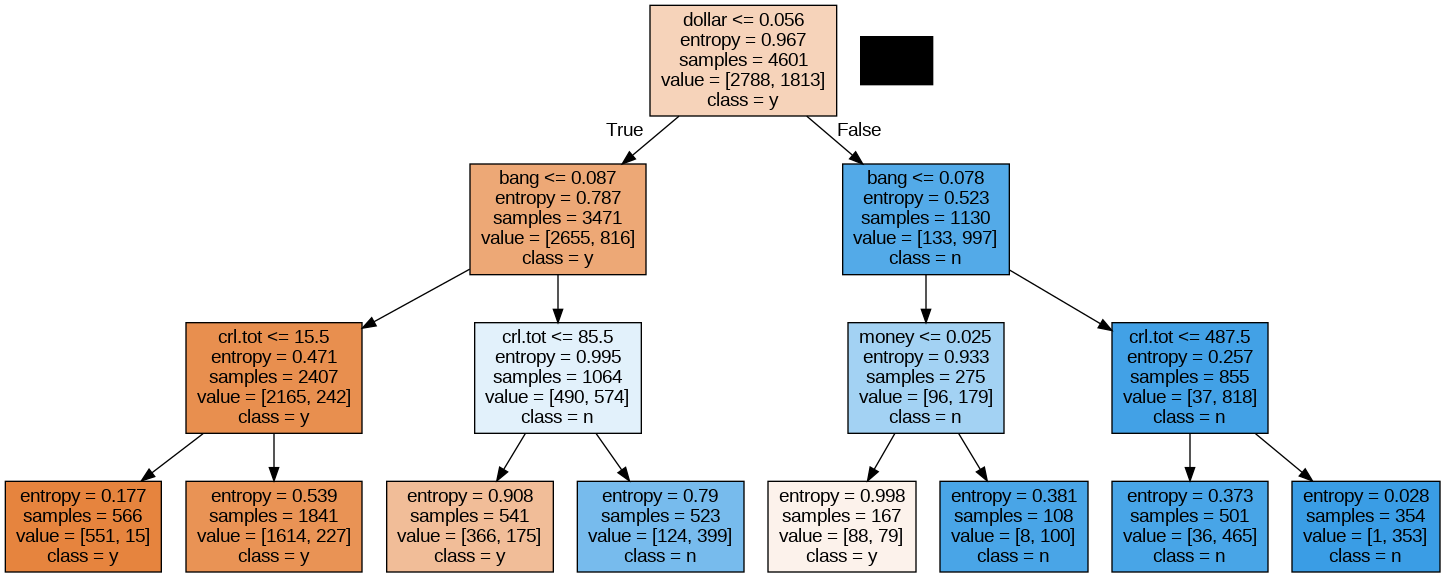

In [85]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['y','n'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [86]:
testData = [[34,0.0,0.0,0.0,0.0,0.0,'n'],
           [82,0.196,0.0,0.0,0.0,0.0,'y'],
           [40,0.0,0.125,0.0,0.0,0.0,'n'],
           [898,0.23,0.278,0.26,0.19,0.46,'y']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,crl.tot,dollar,bang,money,n000,make,yesno
0,34,0.000,0.000,0.00,0.00,0.00,n
1,82,0.196,0.000,0.00,0.00,0.00,y
2,40,0.000,0.125,0.00,0.00,0.00,n
3,898,0.230,0.278,0.26,0.19,0.46,y


In [87]:
testY = testData['yesno']
testX = testData.drop(['yesno'],axis=1)

predY = clf.predict(testX)
predictions = pd.Series(predY,name='Predicted Class')
predictions

0    n
1    n
2    n
3    y
Name: Predicted Class, dtype: object

In [88]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


#Decision Tree Creation
##Overview:
Using the 'sklearn' library, a decision tree classifier with entropy as the criterion and a maximum depth of 3 is constructed based on the spam e-mail dataset. The resulting tree is visualized using 'pydotplus'.
##Summary:
A decision tree algorithm is trained on the 'yesno' target variable from the dataset, and then a visualization of the tree is generated to understand how e-mails are classified as spam or not.

#Testing and Performance Evaluation
##Overview:
A set of test data, comprising e-mails with known attributes, is evaluated using the previously constructed decision tree. The performance of the model is then assessed by comparing the predicted classifications to the actual ones.
##Summary:
Four e-mails are evaluated using the decision tree, resulting in predictions of whether each e-mail is spam. The model's accuracy is then calculated, showing a 75% accuracy rate on this test data set.

##Model Overfitting

Text(0, 0.5, 'Accuracy')

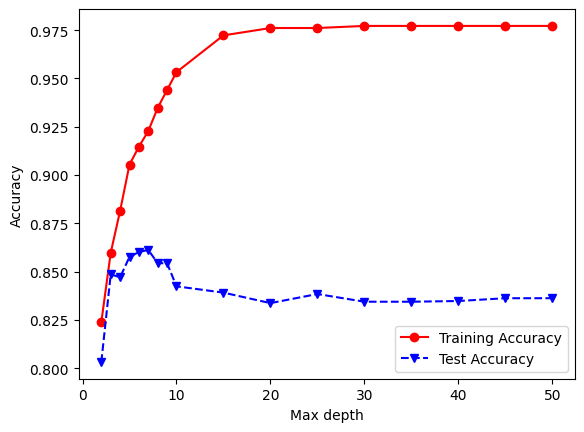

In [89]:
#########################################
# Training and Test set creation
#########################################
import numpy as np
import matplotlib.pyplot as plt

X = data.drop(['yesno'],axis=1)
Y = data['yesno']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#Model Overfitting Overview
The dataset is initially partitioned into feature and target variables and then divided into training and testing subsets. Using decision tree classifiers with varied maximum depths, models are trained and their performance is evaluated. The resultant accuracies for both training and test data are then visualized against the tree depths.

#Model Overfitting Summary
Utilizing 'sklearn', the dataset is divided and trained using decision tree classifiers at different depths. A subsequent graphical representation demonstrates the relationship between tree depth and model accuracy, offering insights into model performance and potential overfitting scenarios.

##Alternative Classification Techniques

###K-Nearest neighbor classifier


In [90]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))
clf

KNeighborsClassifier(n_neighbors=30)

Text(0, 0.5, 'Accuracy')

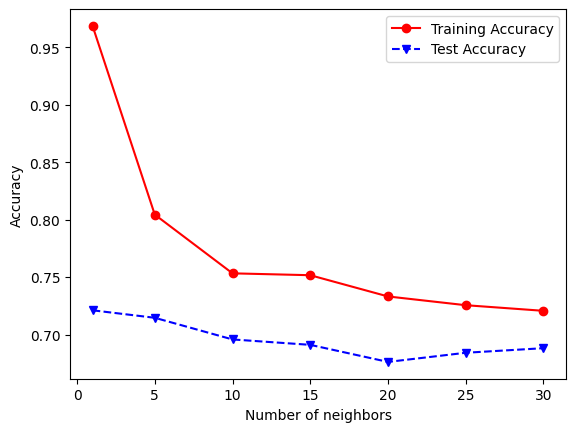

In [91]:
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

#Summary K-Nearest neighbor classifier
The graph illustrates the accuracy of a K-Nearest Neighbors (KNN) model based on varying neighbor counts. As neighbors increase, training accuracy declines steadily while test accuracy shows minor fluctuations. The trends indicate a balance between model complexity and its generalization capability.

##Linear Classifiers

In [92]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

#taken help from ChatGPT
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for param in C:
    clf = linear_model.LogisticRegression(C=param, max_iter=10000) #
    clf.fit(X_train_scaled, Y_train)
    Y_predTrain = clf.predict(X_train_scaled)
    Y_predTest = clf.predict(X_test_scaled)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))

    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train_scaled, Y_train)
    Y_predTrain = clf.predict(X_train_scaled)
    Y_predTest = clf.predict(X_test_scaled)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))
clf

SVC(C=50, kernel='linear')

Text(0, 0.5, 'Accuracy')

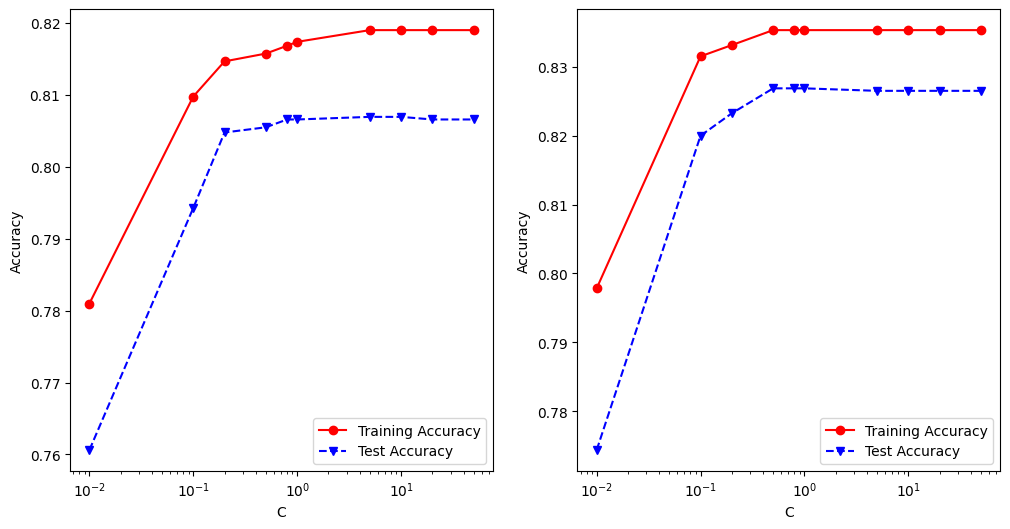

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

#Summary Linear Classifiers
Both graphs illustrate how the model's accuracy on training and test datasets responds to varying the regularization parameter 'C'. Training accuracy consistently ascends with increasing 'C', whereas test accuracy sees an initial boost before leveling off. The parallel trends in the charts hint at a uniform pattern regardless of specific dataset conditions, with a potential optimal 'C' range indicated by the test accuracy stabilization.

##Nonlinear Support Vector Machine

In [94]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))
clf

SVC(C=50, gamma='auto')

Text(0, 0.5, 'Accuracy')

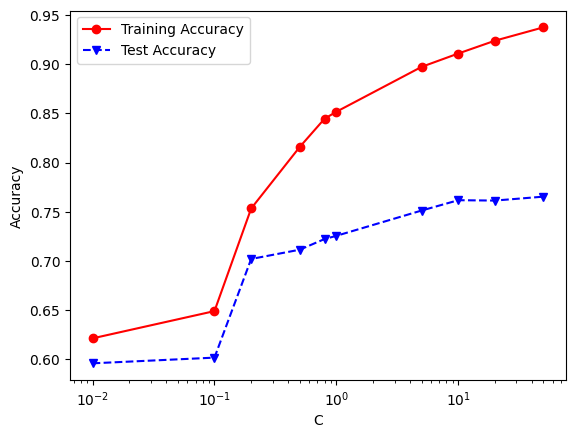

In [95]:
plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

#Summary Nonlinear Support Vector Machine
The graph portrays the impact of the regularization parameter 'C' on model accuracy for both training and test datasets. As 'C' augments, training accuracy exhibits a steady ascent, while test accuracy first sees a sharp rise, then moderates and stabilizes. The distinction in trends suggests that as 'C' increases, the model might overfit to the training data.

##Ensemble Methods

In [96]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [97]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=500)

In [98]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=500)

[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

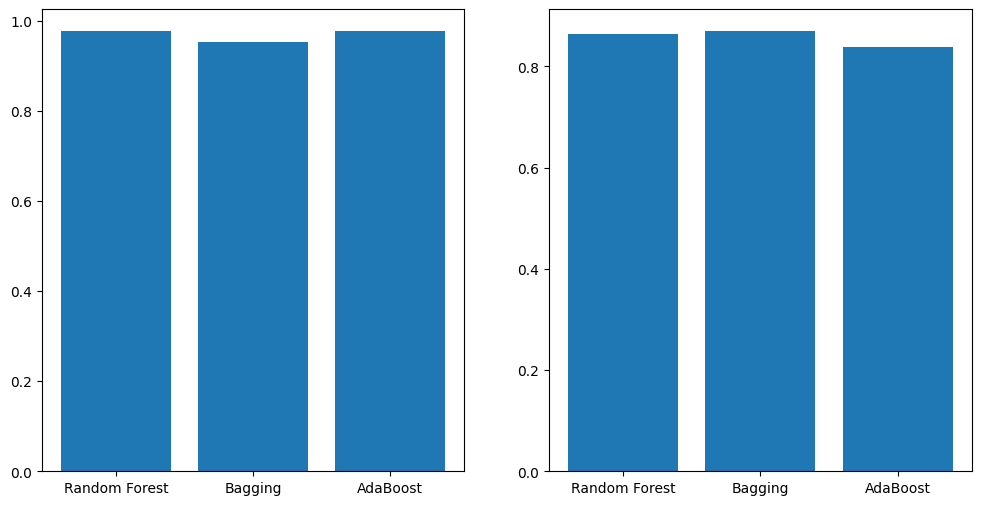

In [99]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

#Summary Ensemble Methods
The bar charts compare the performance of three ensemble methods: Random Forest, Bagging, and AdaBoost. In both charts, each method delivers high and comparable performance, nearing 1.0. The slight variations between the two graphs suggest different datasets or evaluation metrics, but the ensemble techniques consistently perform well.

#Key Takeaways
1. The Data: Before doing anything, we need to check our data. We can use tools like crosstab to see what's inside. Also, adjusting our data can help some tools, like SVM, work better.

2. Choosing the Right Model: Some models can be very detailed, but if they're too detailed, they might not work well with new data. This is called overfitting. Think of it like having a map that's too detailed to read quickly.

3. Tuning Settings: Tools like KNN and SVM have settings called hyperparameters. Changing these settings can make a big difference in results.

4. Using Multiple Tools Together: Some methods use many tools at once to get better results. This can make our predictions more accurate and avoid overfitting.

5. Overall: This work helped us see how to use and adjust different tools. It's important to know your tools well, prepare your data, and keep checking and adjusting as needed.